In [1]:
# data_dir = '../data/data/'
# csv_name = 'driving_log.csv'

# # columns: center, left, right, steering, throttle, brake, speed
# train_data = pd.read_csv(data_dir+csv_name)
# train_data.head()

# X_train = train_data[['left','center','right']]
# y_train = train_data['steering']

# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=19)

img_shape = (160, 320, 3)


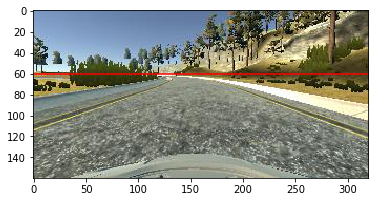

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

use_own_data = True

if use_own_data:
    path = '/home/florian/Desktop/Data/'
    example_img = plt.imread(path+'IMG/'+os.listdir(path+'IMG')[0])
else:
    path = '../data/data/'
    example_img = plt.imread(path+'IMG/center_2016_12_01_13_30_48_287.jpg')


plt.imshow(example_img)

img_shape = example_img.shape
print('img_shape =',img_shape)

x_val = np.arange(0,example_img.shape[1])
plt.plot(x_val, np.ones(len(x_val))*60, 'r')

top_crop = 60
bottom_crop = 0
left_crop = 0
right_crop = 0

In [4]:
import csv

samples = []
angles = []
with open(path+'driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) # skip headers in first row
    for line in reader:
        samples.append(line)
        angles.append(float(line[3]))

from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(samples, test_size=0.2)

print('number of images: ',len(samples))
print('number of training samples: ', len(train_samples))
print('number of validation samples: ', len(validation_samples))

number of images:  19296
number of training samples:  15436
number of validation samples:  3860


1.0


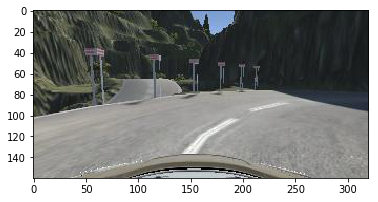

0.0


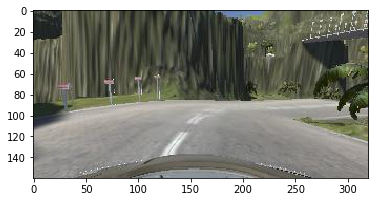

-0.02352941


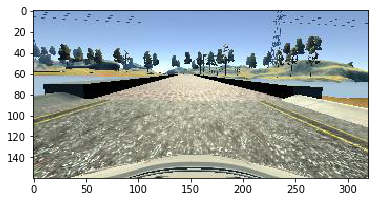

In [5]:
# display example images and angles:
for i in range(3):
    rand_num = np.random.randint(len(samples))
    rand_sample = samples[rand_num]
    center_img_name = path+'IMG/'+rand_sample[0].split('/')[-1]
    center_img = plt.imread(center_img_name)
    center_angle = float(rand_sample[3])
    print(center_angle)
    plt.imshow(center_img); plt.show()

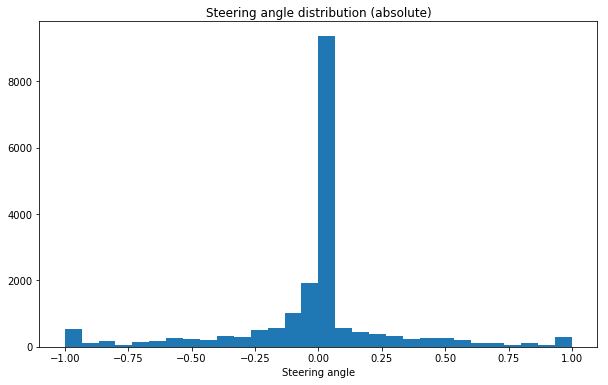

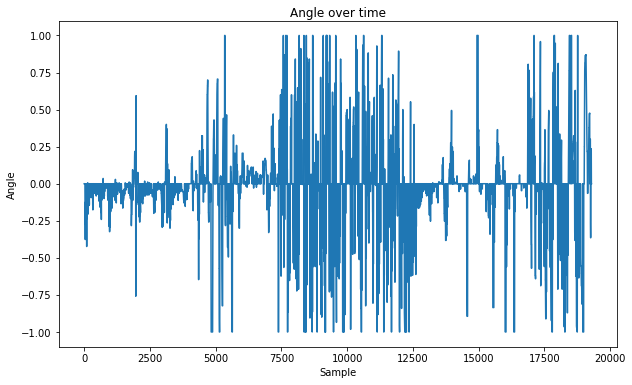

In [6]:
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(10,6))
# sns.distplot(angles, kde=False)
plt.hist(angles, 30)
plt.title('Steering angle distribution (absolute)')
plt.xlabel('Steering angle')
plt.show()

# %matplotlib notebook
fig = plt.figure(figsize=(10,6))
plt.plot(angles)
plt.title('Angle over time')
plt.xlabel('Sample')
plt.ylabel('Angle')
plt.show()

In [7]:
import cv2
import numpy as np
import sklearn
from scipy import ndimage # for importing image as RGB

# angle_offset = 2

def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1:
        samples = sklearn.utils.shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                center_img_name = path+'IMG/'+batch_sample[0].split('/')[-1]
                center_img = plt.imread(center_img_name)
#                 left_img_name = path+'IMG/'+batch_sample[1].split('/')[-1]
#                 left_img = plt.imread(left_img_name)
#                 right_img_name = path+'IMG/'+batch_sample[2].split('/')[-1]
#                 right_img = plt.imread(right_img_name)
                center_angle = float(batch_sample[3])
#                 left_angle = center_angle + angle_offset
#                 right_angle = center_angle - angle_offset
                images.append(center_img)
                angles.append(center_angle)

            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)

            

In [8]:
# # augmentation
# import numpy as np
# image_flipped = np.fliplr(image)
# measurement_flipped = -measurement

In [9]:
# # use all three images
#    with open(csv_file, 'r') as f:
#         reader = csv.reader(f)
#         for row in reader:
#             steering_center = float(row[3])

#             # create adjusted steering measurements for the side camera images
#             correction = 0.2 # this is a parameter to tune
#             steering_left = steering_center + correction
#             steering_right = steering_center - correction

#             # read in images from center, left and right cameras
#             path = "..." # fill in the path to your training IMG directory
#             img_center = process_image(np.asarray(Image.open(path + row[0])))
#             img_left = process_image(np.asarray(Image.open(path + row[1])))
#             img_right = process_image(np.asarray(Image.open(path + row[2])))

#             # add images and angles to data set
#             car_images.extend(img_center, img_left, img_right)
#             steering_angles.extend(steering_center, steering_left, steering_right)


In [10]:
import tensorflow as tf
print(tf.test.is_gpu_available())
print(tf.test.gpu_device_name())
print(tf.test.is_built_with_cuda())

/home/florian/.conda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/florian/.conda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/florian/.conda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/florian/.conda/envs/carnd-term1

True
/device:GPU:0
True


/home/florian/.conda/envs/carnd-term1/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/florian/.conda/envs/carnd-term1/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/florian/.conda/envs/carnd-term1/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/florian/.c

In [11]:
print('input_shape: ', img_shape)

input_shape:  (160, 320, 3)


In [12]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Lambda, Dense, Activation, Flatten, Dropout
from keras.layers import Cropping2D
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

    
# Set batch size
batch_size = 32

# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=batch_size)
validation_generator = generator(validation_samples, batch_size=batch_size)


row, col, ch = img_shape[0], img_shape[1], img_shape[2]  # Trimmed image format

model = Sequential()
# Preprocess incoming data, centered around zero with small standard deviation 
model.add(Lambda(lambda x: x/127.5 - 1., input_shape=(row, col, ch), output_shape=(row, col, ch)))
model.add(Cropping2D(cropping=((top_crop, bottom_crop),(left_crop, right_crop))))
model.add(Conv2D(24, kernel_size=(5, 5), strides=(2,2), activation='relu'))#, subsample=(2, 2)))
model.add(Conv2D(36, kernel_size=(5, 5), strides=(2,2), activation='relu'))#, subsample=(2, 2)))
model.add(Conv2D(48, kernel_size=(5, 5), strides=(2,2), activation='relu'))#, subsample=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1,1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1,1), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))

model.summary()

Using TensorFlow backend.
W0829 18:23:13.749037 139812219762496 deprecation_wrapper.py:119] From /home/florian/.conda/envs/carnd-term1/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:63: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 18:23:13.751538 139812219762496 deprecation_wrapper.py:119] From /home/florian/.conda/envs/carnd-term1/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:488: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 18:23:13.767889 139812219762496 deprecation_wrapper.py:119] From /home/florian/.conda/envs/carnd-term1/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3626: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 18:23:13.860422 139812219762496 deprecation.py:506] From /home/florian/.conda/envs/carnd-term1/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:1255: callin

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 100, 320, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 37, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 35, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 33, 64)         36928     
__________

In [13]:
save_path = './model.h5'
num_epochs = 20

model.compile(loss='mse', optimizer='adam')
# model.compile(optimizer=Adam(learning_rate), loss='mse')# metrics=['accuracy']

checkpoint = ModelCheckpoint(filepath=save_path, monitor='val_loss', save_best_only=True)
stopper = EarlyStopping(monitor='val_loss', min_delta=0.0003, patience=5)

history = model.fit_generator(train_generator, 
                    steps_per_epoch=np.ceil(len(train_samples)/batch_size), 
                    validation_data=validation_generator, 
                    validation_steps=np.ceil(len(validation_samples)/batch_size), 
                    callbacks=[checkpoint, stopper],
                    epochs=num_epochs,
                    verbose=1)

W0829 18:23:14.006191 139812219762496 deprecation_wrapper.py:119] From /home/florian/.conda/envs/carnd-term1/lib/python3.5/site-packages/keras/optimizers.py:711: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0829 18:23:14.438054 139812219762496 deprecation_wrapper.py:119] From /home/florian/.conda/envs/carnd-term1/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:949: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0829 18:23:14.454519 139812219762496 deprecation.py:506] From /home/florian/.conda/envs/carnd-term1/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:671: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0829 18:23:14.605063 139812219762496 deprecation_wrapper.py:119] 

Epoch 1/20
483/483 [==============================] - 79s 164ms/step - loss: 0.0995 - acc: 0.4249 - val_loss: 0.0920 - val_acc: 0.4316
Epoch 2/20
483/483 [==============================] - 74s 153ms/step - loss: 0.0834 - acc: 0.4260 - val_loss: 0.0839 - val_acc: 0.4306
Epoch 3/20
483/483 [==============================] - 74s 152ms/step - loss: 0.0779 - acc: 0.4260 - val_loss: 0.0754 - val_acc: 0.4337
Epoch 4/20
483/483 [==============================] - 71s 148ms/step - loss: 0.0728 - acc: 0.4276 - val_loss: 0.0670 - val_acc: 0.4316
Epoch 5/20
483/483 [==============================] - 71s 147ms/step - loss: 0.0696 - acc: 0.4286 - val_loss: 0.0636 - val_acc: 0.4404
Epoch 6/20
483/483 [==============================] - 74s 154ms/step - loss: 0.0667 - acc: 0.4301 - val_loss: 0.0568 - val_acc: 0.4345
Epoch 7/20
483/483 [==============================] - 72s 149ms/step - loss: 0.0648 - acc: 0.4298 - val_loss: 0.0536 - val_acc: 0.4396
Epoch 8/20
483/483 [==============================] - 7

dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])


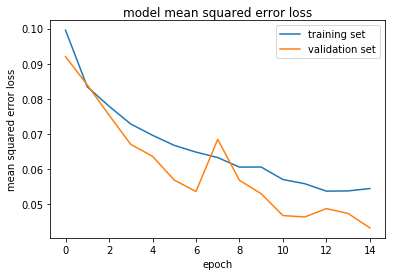

In [14]:
print(history.history.keys())
### plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

# # working:
# model.fit_generator(train_generator, 
#                     steps_per_epoch=np.ceil(len(train_samples)/batch_size), 
#                     validation_data=validation_generator, 
#                     validation_steps=np.ceil(len(validation_samples)/batch_size), 
#                     epochs=5, 
#                     verbose=1)

# model.save('model.h5')


# # Note: we aren't using callbacks here since we only are using 5 epochs to conserve GPU time
# model.fit_generator(datagen.flow(X_train, y_one_hot_train, batch_size=batch_size), 
#                     steps_per_epoch=len(X_train)/batch_size, epochs=epochs, verbose=1, 
#                     validation_data=val_datagen.flow(X_val, y_one_hot_val, batch_size=batch_size),
#                     validation_steps=len(X_val)/batch_size)

## GPU time

The rest of the notebook will give you the code for training, so you can turn on the GPU at this point - but first, **make sure to save your jupyter notebook**. Once the GPU is turned on, it will load whatever your last notebook checkpoint is. 

While we suggest reading through the code below to make sure you understand it, you can otherwise go ahead and select *Cell > Run All* (or *Kernel > Restart & Run All* if already using GPU) to run through all cells in the notebook.

In [ ]:
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from keras.datasets import cifar10

(X_train, y_train), (X_val, y_val) = cifar10.load_data()

# One-hot encode the labels
label_binarizer = LabelBinarizer()
y_one_hot_train = label_binarizer.fit_transform(y_train)
y_one_hot_val = label_binarizer.fit_transform(y_val)

# Shuffle the training & test data
X_train, y_one_hot_train = shuffle(X_train, y_one_hot_train)
X_val, y_one_hot_val = shuffle(X_val, y_one_hot_val)

# We are only going to use the first 10,000 images for speed reasons
# And only the first 2,000 images from the test set
X_train = X_train[:10000]
y_one_hot_train = y_one_hot_train[:10000]
X_val = X_val[:2000]
y_one_hot_val = y_one_hot_val[:2000]

You can check out Keras's [ImageDataGenerator documentation](https://faroit.github.io/keras-docs/2.0.9/preprocessing/image/) for more information on the below - you can also add additional image augmentation through this function, although we are skipping that step here so you can potentially explore it in the upcoming project.

In [ ]:
# Use a generator to pre-process our images for ImageNet
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input

if preprocess_flag == True:
    datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
else:
    datagen = ImageDataGenerator()
    val_datagen = ImageDataGenerator()